# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_Anna.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
#Create dataframe to make sure I am pulling cities into the list
weather_df = pd.DataFrame(
    {
        'City': cities,
        'Lat': "",
        'Lng': "",
        'Max Temp': "", 
        'Humidity': "", 
        'Cloudiness': "", 
        'Wind Speed': "", 
        'Country': "", 
        'Date': ""
    })
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,,,,,,,,
1,mataura,,,,,,,,
2,taolanaro,,,,,,,,
3,dikson,,,,,,,,
4,lexington,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Loop to add info into dataframe, start with print command
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

#Iterate through the dataframe and store info
for index, row in weather_df.iterrows():
    
    #Create URL with my API key
    base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
    query_url = base_url + row['City'] + ',' + '&APPID=' + weather_api_key

    #Call API
    response = requests.get(query_url).json()
    
    try:
        #Error message if city not found
        print(f'Processing Weather Data for Record {response["name"]}')
        
        #Store data in dataframe
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
   
    except (KeyError, IndexError):
        print("City not found...Skipping.")

#API complete statement
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')




-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record Albany
City not found...Skipping.
City not found...Skipping.
Processing Weather Data for Record Dikson
Processing Weather Data for Record Lexington
Processing Weather Data for Record Namatanai
Processing Weather Data for Record Butaritari
City not found...Skipping.
Processing Weather Data for Record Severo-Kuril'sk
Processing Weather Data for Record Pisco
Processing Weather Data for Record Nipawin
Processing Weather Data for Record Port Elizabeth
Processing Weather Data for Record Eenhana
Processing Weather Data for Record Cape Town
Processing Weather Data for Record Boa Vista
City not found...Skipping.
Processing Weather Data for Record Quatre Cocos
City not found...Skipping.
Processing Weather Data for Record Thompson
Processing Weather Data for Record Cayenne
Processing Weather Data for Record São João da Barra
Processing Weather Data for Record Liverpool
Processi

Processing Weather Data for Record Saint-Pierre
Processing Weather Data for Record Faanui
Processing Weather Data for Record Ostrovnoy
Processing Weather Data for Record Casper
Processing Weather Data for Record Hithadhoo
Processing Weather Data for Record Mahon
Processing Weather Data for Record Genhe
Processing Weather Data for Record Kyabram
Processing Weather Data for Record Abakaliki
Processing Weather Data for Record Los Llanos de Aridane
Processing Weather Data for Record Utete
Processing Weather Data for Record Oxford
City not found...Skipping.
Processing Weather Data for Record Vila Franca do Campo
Processing Weather Data for Record Hudson Bay
City not found...Skipping.
Processing Weather Data for Record Araguaçu
City not found...Skipping.
Processing Weather Data for Record Deputatsky
Processing Weather Data for Record Kloulklubed
Processing Weather Data for Record Loa Janan
City not found...Skipping.
City not found...Skipping.
Processing Weather Data for Record Castro
Process

City not found...Skipping.
City not found...Skipping.
Processing Weather Data for Record Evensk
Processing Weather Data for Record Vao
Processing Weather Data for Record Porlamar
Processing Weather Data for Record Kudahuvadhoo
Processing Weather Data for Record Baykit
Processing Weather Data for Record Chul'man
Processing Weather Data for Record Half Moon Bay
Processing Weather Data for Record Khryashchevka
Processing Weather Data for Record Touho
Processing Weather Data for Record Cabedelo
Processing Weather Data for Record Warrington
Processing Weather Data for Record Pāsighāt
Processing Weather Data for Record Kukurečani
City not found...Skipping.
City not found...Skipping.
City not found...Skipping.
Processing Weather Data for Record Ouadda
Processing Weather Data for Record Provideniya
Processing Weather Data for Record Coquimbo
Processing Weather Data for Record Visnes
Processing Weather Data for Record Shahreza
Processing Weather Data for Record Linqiong
Processing Weather Data 

Processing Weather Data for Record Nioro
Processing Weather Data for Record Kyaikto
Processing Weather Data for Record Champerico
Processing Weather Data for Record Tigil'
Processing Weather Data for Record Toora-Khem
City not found...Skipping.
Processing Weather Data for Record Makakilo City
Processing Weather Data for Record Lianran
City not found...Skipping.
Processing Weather Data for Record Tartous
Processing Weather Data for Record Coyhaique
Processing Weather Data for Record Qui Nhon
City not found...Skipping.
Processing Weather Data for Record Pulivendla
Processing Weather Data for Record Zambezi
Processing Weather Data for Record Tazovsky
Processing Weather Data for Record Misratah
Processing Weather Data for Record Bagdarin
Processing Weather Data for Record Kapuskasing
Processing Weather Data for Record Bako
Processing Weather Data for Record Seidu
City not found...Skipping.
Processing Weather Data for Record Shangzhi
Processing Weather Data for Record Pemangkat
Processing W

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# #Remove cities / clean datafrane
weather_df['Max Temp'] = weather_df['Max Temp'].replace('', np.nan)
weather_df = weather_df.dropna()

#Preview to make sure it's working
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6,-73.97,39.99,66,95,5.99,US,1604378115
3,dikson,73.51,80.55,10.69,95,13,8.14,RU,1604378210
4,lexington,37.99,-84.48,36.00,55,1,6.93,US,1604378145
5,namatanai,-3.67,152.43,83.55,74,68,4.63,PG,1604378210
6,butaritari,3.07,172.79,80.85,76,1,17.05,KI,1604378210


In [6]:
# #Output data to csv file
weather_df.to_csv("weather_df.csv", index=False, header=True)

In [25]:
# weather_df[[
#     'City',
#     'Lat',
#     'Lng',
#     'Max Temp', 
#     'Humidity', 
#     'Cloudiness', 
#     'Wind Speed', 
#     'Country', 
#     'Date']].describe()

,Max Temp
count,539.000000
mean,57.536772
std,22.486505
min,-14.800000
25%,43.005000
50%,61.860000
75%,75.935000
max,102.200000


In [83]:
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)
weather_df.describe(include='all')


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,539,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539,5.390000e+02
unique,539,NaN,NaN,NaN,NaN,NaN,NaN,110,NaN
top,upernavik,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN
mean,NaN,20.824453,12.805399,57.536772,73.105751,52.729128,8.665046,NaN,1.604378e+09
std,NaN,32.638841,92.044210,22.486505,20.682454,39.893316,6.488147,NaN,7.397050e+01
min,NaN,-54.800000,-175.200000,-14.800000,9.000000,0.000000,0.400000,NaN,1.604378e+09
25%,NaN,-6.585000,-69.845000,43.005000,64.000000,5.500000,4.000000,NaN,1.604378e+09
50%,NaN,24.270000,15.160000,61.860000,78.000000,59.000000,6.930000,NaN,1.604378e+09
75%,NaN,49.015000,92.970000,75.935000,89.000000,91.000000,11.410000,NaN,1.604378e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6,-73.97,39.99,66,95,5.99,US,1604378115
3,dikson,73.51,80.55,10.69,95,13,8.14,RU,1604378210
4,lexington,37.99,-84.48,36.00,55,1,6.93,US,1604378145
5,namatanai,-3.67,152.43,83.55,74,68,4.63,PG,1604378210
6,butaritari,3.07,172.79,80.85,76,1,17.05,KI,1604378210
...,...,...,...,...,...,...,...,...,...
607,okhotsk,59.38,143.3,31.59,94,100,23.73,RU,1604378357
608,dalbandin,28.89,64.41,69.55,15,0,5.35,PK,1604378358
609,suleja,9.18,7.18,69.80,83,0,4.7,NG,1604378358
610,paita,-5.09,-81.11,61.56,90,86,7.78,PE,1604378358


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

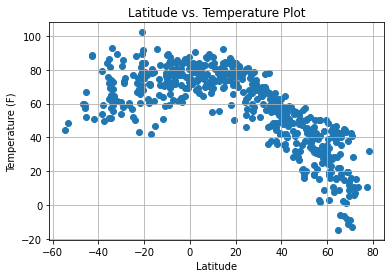

In [36]:
#Plot scatter
weather_df["Lat"] = weather_df["Lat"].astype(float)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o")
plt.title(f"Latitude vs. Temperature Plot")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

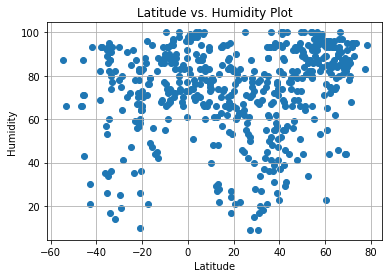

In [37]:
#Plot scatter
weather_df["Lat"] = weather_df["Lat"].astype(float)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o")
plt.title(f"Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

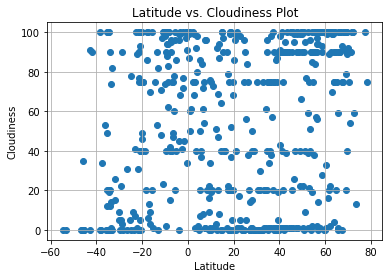

In [39]:
#Plot scatter
weather_df["Lat"] = weather_df["Lat"].astype(float)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o")
plt.title(f"Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

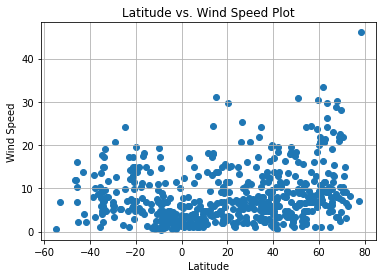

In [13]:
#Plot scatter
weather_df["Lat"] = weather_df["Lat"].astype(float)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o")
plt.title(f"Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [55]:
# Create northern and southern dataframes
weather_df["Lat"] = weather_df["Lat"].astype(float)
n_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
s_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [56]:
n_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,39.99,66,95,5.99,US,1604378115
3,dikson,73.51,80.55,10.69,95,13,8.14,RU,1604378210
4,lexington,37.99,-84.48,36.00,55,1,6.93,US,1604378145
6,butaritari,3.07,172.79,80.85,76,1,17.05,KI,1604378210
8,severo-kurilsk,50.68,156.12,44.69,89,100,30.94,RU,1604378211
...,...,...,...,...,...,...,...,...,...
606,puri,19.80,85.85,84.20,66,20,11.41,IN,1604378357
607,okhotsk,59.38,143.3,31.59,94,100,23.73,RU,1604378357
608,dalbandin,28.89,64.41,69.55,15,0,5.35,PK,1604378358
609,suleja,9.18,7.18,69.80,83,0,4.7,NG,1604378358


In [57]:
s_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,namatanai,-3.67,152.43,83.55,74,68,4.63,PG,1604378210
9,pisco,-13.70,-76.22,64.99,82,90,13.87,PE,1604378211
11,port elizabeth,-33.92,25.57,64.40,93,20,14.99,ZA,1604378212
12,eenhana,-17.47,16.33,71.60,21,6,4.7,NA,1604378212
13,cape town,-33.93,18.42,63.00,87,0,4.7,ZA,1604378158
...,...,...,...,...,...,...,...,...,...
574,tupa,-21.93,-50.51,60.04,72,0,7.43,BR,1604378348
578,ambilobe,-13.20,49.05,82.81,42,0,6.29,MG,1604378349
590,coihaique,-45.58,-72.07,51.80,71,0,6.93,CL,1604378243
594,zambezi,-13.54,23.1,74.30,45,53,4.9,ZM,1604378354


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

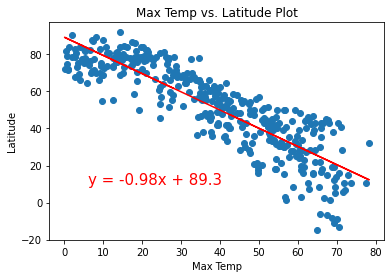

In [58]:
# Add the linear regression equation and line to plot
x_values = n_hemisphere['Lat']
y_values = n_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Max Temp vs. Latitude Plot')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

In [59]:
#Save image
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

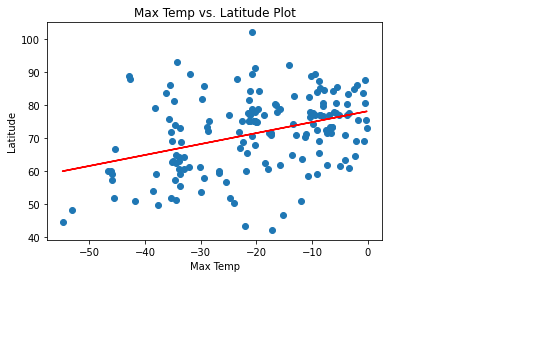

In [60]:
# Add the linear regression equation and line to plot
x_values = s_hemisphere['Lat']
y_values = s_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Max Temp vs. Latitude Plot')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

In [61]:
#Save image
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

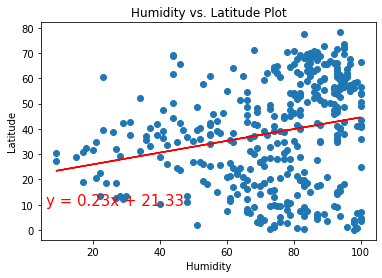

In [65]:
# Add the linear regression equation and line to plot
x_values = n_hemisphere['Humidity'].astype(float)
y_values = n_hemisphere['Lat'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Humidity vs. Latitude Plot')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

In [66]:
#Save image
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

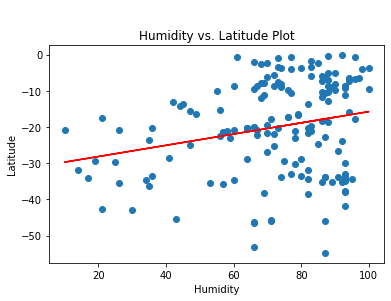

In [67]:
# Add the linear regression equation and line to plot
x_values = s_hemisphere['Humidity'].astype(float)
y_values = s_hemisphere['Lat'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Humidity vs. Latitude Plot')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

In [68]:
#Save image
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

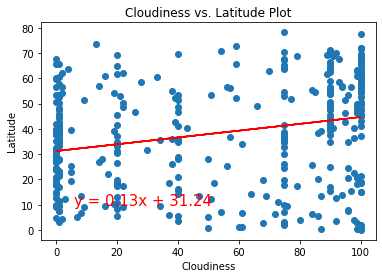

In [69]:
# Add the linear regression equation and line to plot
x_values = n_hemisphere['Cloudiness'].astype(float)
y_values = n_hemisphere['Lat'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude Plot')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

In [70]:
#Save image
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

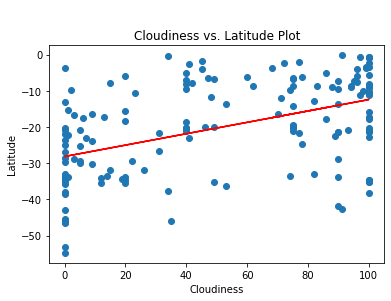

In [71]:
# Add the linear regression equation and line to plot
x_values = s_hemisphere['Cloudiness'].astype(float)
y_values = s_hemisphere['Lat'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude Plot')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

In [72]:
#Save image
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

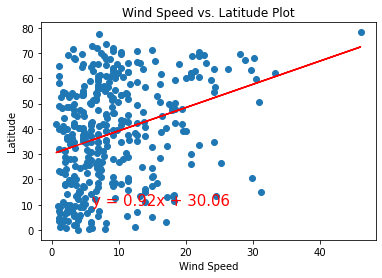

In [73]:
# Add the linear regression equation and line to plot
x_values = n_hemisphere['Wind Speed'].astype(float)
y_values = n_hemisphere['Lat'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude Plot')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

In [74]:
#Save image
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

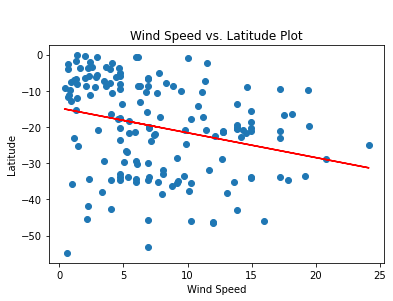

In [75]:
# Add the linear regression equation and line to plot
x_values = s_hemisphere['Wind Speed'].astype(float)
y_values = s_hemisphere['Lat'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude Plot')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

In [76]:
#Save image
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

<Figure size 432x288 with 0 Axes>